## Data Visualization and Analysis for the variable Sqft Living

In [19]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 

In [20]:
# Import subset for Zipcodes by Quarter
houseClean = pd.read_csv("./data/Modified/houseClean_dates.csv", index_col=False)
houseClean.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter
0,0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,4
4,4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


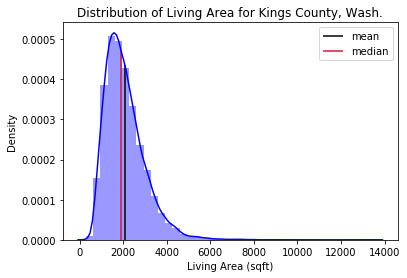

In [21]:
''' Distribution of Sqft Living '''
x_ax = houseClean['sqft_living']
sqftliv_dist = sns.distplot(x_ax, bins=40, color='blue')

# Measures of centrality: mean and median
mean = x_ax.mean()
median = x_ax.median()

# Setting parameters for mean line
kdeline = sqftliv_dist.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# Height of mean and median lines
mean_ht = np.interp(mean, xs, ys)
median_ht = np.interp(median, xs, ys)

# Plotting the mean and median
sqftliv_dist.vlines(mean, 0, mean_ht, color='black')
sqftliv_dist.vlines(median, 0, median_ht, color='crimson')

# Title, Legend, and Axis Labels
plt.title("Distribution of Living Area for Kings County, Wash.")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Density")
plt.legend(['mean','median'])
plt.savefig('LivingAreaDist.png')
plt.show()

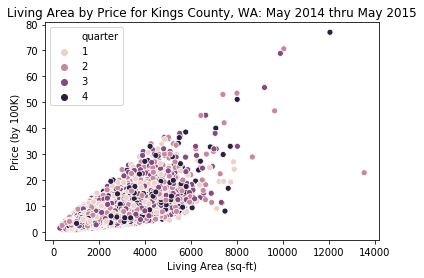

In [22]:
''' Scatterplot of the Living area and Price. '''
X = houseClean['sqft_living']
y = houseClean['price']/100000
sns.scatterplot(data=houseClean, x=X, y=y, hue="quarter")
plt.title('Living Area by Price for Kings County, WA: May 2014 thru May 2015')
plt.xlabel('Living Area (sq-ft)')
plt.ylabel('Price (by 100K)')
plt.savefig('LivingAreaPriceScatter.png')
plt.show()